# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/
---

* [1. Keras에서의 Functional Paradigm](#Keras에서의-Functional-Paradigm ) <br>
     *  [ callable](#callable)
     *  [1.1 Sequential 방식](#Sequential-방식)
     *  [1.2 Model 방식](#Model-방식)
         *  [Input](#Input)
         *  [Model](#Model)
         *  [concatnate](#concatnate)

---

In [1]:
import tensorflow as tf

In [2]:
tf.keras.__version__ #2.4버전

'2.4.0'

만드는 방법은 총 5가지
- 그 중 Keras에서 모델 만드는 3가지 방법
    1. Sequential (제일 간단)
        - 복잡한 모델이 아닌 일직선 만 가능.
        - layer가 순차적으로 진행

    2. **`Model` functional Paradigm(기본)**
      -   실행은 합성합수롤 사용하고 선언의 장점을 활용
    3. `Mode` class 상속

## Keras에서의 Functional Paradigm
TensorFlow Functional API(함수형 API) 공식문서 참조: https://www.tensorflow.org/guide/keras/functional


- Functional Paradigm 이용해서 tensorflow keras 이용하는 것은 아주 아주 중요함
-  이제는 Functional API 방식으로 위의 모델을 구현(전문가 버전)

    
 [Colah의 블로그의 글: Neural Networks, Types, and Functional Programming](https://colah.github.io/posts/2015-09-NN-Types-FP/)
   
 딥러닝.pdf 참고
- 뉴럴 네트워크하고  행렬 연산(array programming)하고 연관 있음
     -  복잡한 모델을 갖을 수가 있음
     - **합성 함수** : $(h∘g∘f)(x)= h(g(f(x))$
     - keras를 함수형 패러다임으로 만들수 있는데 어렵기 떄문에 시작에서는 `Sequential` 부터 배웠음 

#### callable
- `_call__`에는 인스턴스가 `()` 붙일수 있으면서(callable) 합성합수형식으로 사용 

In [3]:
class X:
    def __call__(self):
        print('X')

In [4]:
a=X()  #인스턴스화
a

In [5]:
tf.keras.layers.Dense(2)


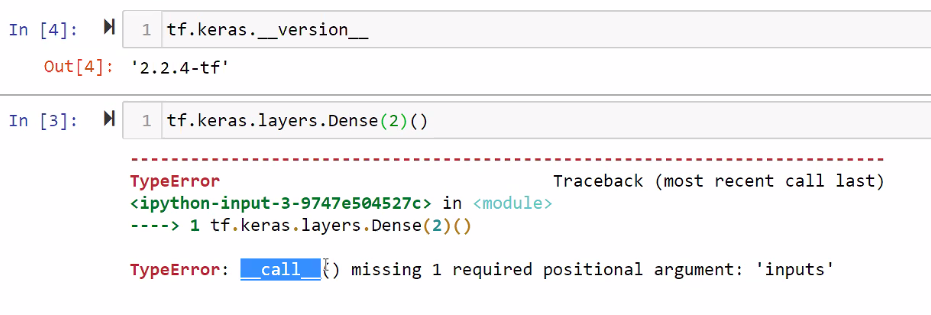
#버전 2.2.4 에서는  __call__() missing 1 required positional arg:inputs 

In [6]:
tf.keras.layers.Dense(2)() # __call__() missing 1 required positional arg:inputs

ValueError: The first argument to `Layer.call` must always be passed.

In [7]:
import numpy as np
#1 x
x=np.array([[1,2],[3,4]])  #2x2 행렬
x

array([[1, 2],
       [3, 4]])

- `kernel_initialize= 'ones'`
    - 2x2 형태의 1로 이루어진 행렬로 초기화
- `use_bias =False`
    -  비편향을 사용하지 않음

인스턴스에서 callable 가능하도록함

$ \sum X∘W +0 $

In [13]:
#2  a(x)
a=tf.keras.layers.Dense(2, kernel_initializer='ones',use_bias=False)(x) #함수처럼 사용
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3., 3.],
       [7., 7.]], dtype=float32)>

In [14]:
#3 b(a(x))
b=tf.keras.layers.Dense(3)(a)
b

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[3.169493 , 0.9230554, 3.635265 ],
       [7.395484 , 2.153796 , 8.4822855]], dtype=float32)>

위의 3단계를 하나로 합성 함수 형식으로 한줄에 사용

In [15]:
# b(a(x))
tf.keras.layers.Dense(3)(tf.keras.layers.Dense(2, kernel_initializer='ones',use_bias=False)(np.array([[1,2],[3,4]])))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.53482294,  0.68833315,  3.5650735 ],
       [-1.24792   ,  1.6061108 ,  8.318504  ]], dtype=float32)>

위의 과정을 수식으로 자세히 확인
- $ \sum X∘W_1(layer1) +0 = Y_1$
- $ \sum Y_1∘W_2(layer2) +0=Y_2$

In [28]:
layer1=tf.keras.layers.Dense(2, kernel_initializer='ones',use_bias=False)
y1=layer1(x)   #중간 output

layer2=tf.keras.layers.Dense(3)
y2=layer2(y1)  #최종 output

In [31]:
layer1.get_weights()[0]

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [35]:
x@layer1.get_weights()[0] #중간 output

array([[3., 3.],
       [7., 7.]])

In [29]:
y1                         #중간 output

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3., 3.],
       [7., 7.]], dtype=float32)>

In [32]:
layer2.get_weights()[0]

array([[ 0.20125663,  0.8733654 , -0.5562298 ],
       [ 0.9683025 ,  0.1607033 ,  0.35998726]], dtype=float32)

In [36]:
y1@layer2.get_weights()[0]#최종 output

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 3.5086775,  3.1022062, -0.5887277],
       [ 8.1869135,  7.238481 , -1.373698 ]], dtype=float32)>

In [30]:
y2  #최종 output

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 3.5086775,  3.1022062, -0.5887277],
       [ 8.1869135,  7.238481 , -1.373698 ]], dtype=float32)>

위의 과정을 한번에 계산하는것을 하단과 각 레이어의 weight 내적(dot product)함

In [33]:
x@layer1.get_weights()[0]@layer2.get_weights()[0]   # 연산의 최종 output

array([[ 3.50867736,  3.10220611, -0.58872771],
       [ 8.18691385,  7.23848093, -1.373698  ]])

---

functional API 방식으로 사용하면 딥러닝으로 사용하면 거의 똑같음
- 하단의 모델과 같이 이전까지는 Sequentiral 모델로 생성한것을 functional programming 그대로 구현

function 을 input으로 받아서 output 을 냄


In [56]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()

In [57]:
X_train=X_train.reshape(-1,28*28)
X_train.shape

(60000, 784)

### Sequential 방식
- 지금 까지 배운 방식으로 가장 간단하게 층을 단반향으로 쌓음
- Sequential은 Model에서 다양한 기능은 제외하고 쉽게 사용하도록 상속 받음.

In [49]:
model2 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [47]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
from tensorflow.keras.models import Model
issubclass(tf.keras.models.Sequential, Model) #Model로부터 상속받음

True

### Model 방식
input_shape 과 동일한 방식으로 이미지를 1차원으로 받음
- tensorflow 코드를 Functional Paradigm 적용
    - function 은 모델을 사용하기 위해서 **함수/클래스 선언/정의**


    1. 한눈에 모델 구조 파악 가능(Model 상속을 통해서 overriding)
    2. summary 사용 가능
    3. 저장해서 불러오는 기능 사용 가능(재사용)
    4. 상황에 따라서 동적 architecture (if문) 사용 가능

    뉴럴 네트워크 기반과 funcaitonal paradigm 이론과 실전을 간극을 줄임

In [48]:
from tensorflow.keras.layers import Input

Model #shift+tab
Input #shift+tab

<function tensorflow.python.keras.engine.input_layer.Input(shape=None, batch_size=None, name=None, dtype=None, sparse=False, tensor=None, ragged=False, **kwargs)>

#### Input
- keras tensor를 인스턴스화함
- shape 지정을 통해서 입력 데이터 크기 기정 
    - `Input(shape=(28,28))` 은 28x28 행렬
    - 기본적으로 None으로 기본값 지정되어있으며 사이즈지정 없음을 의미

하단에 `tf.keras.Input`, `tf.keras.layers.Input` 둘다 가능
- `tf.keras.layers.Input`
    - 명확
- `tf.keras.Input`
   - input layer는 레이어로 포함 시키지 않아서 이것 사용이 더 직관적


In [ ]:
tf.keras.layers.Input #명확하나 input layer 는 layer 로 안치기 때문에 
tf.keras.Input

In [52]:
inputs=tf.keras.Input(shape=(28,28))                #shape 28 x28 행렬  60000개 넣을 예정 
#__call__ 정의 되어서 가능
flatten=tf.keras.layers.Flatten()(inputs)                    #입력데이터 형태 변경
layer1=tf.keras.layers.Dense(128,activation='relu')(flatten) #hidden 레이어
layer2=tf.keras.layers.Dense(10,activation='softmax')(layer1)#output 레이어

#### Model
- 레이어들을 하나의 object 로 그룹화 함
- multi-inputs, multi-outputs:
     - `model=tf.keras.models.Model(inputs= , outputs= )` 입력과 출력이 복수라는것을 알 수 있음


In [53]:
model=tf.keras.models.Model(inputs=inputs, outputs=layer2) 

In [54]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [58]:
#compile, 학습, 검정은 동일
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.fit(X_train, y_train)
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5051 - acc: 0.8945


[0.50508052110672, 0.8945000171661377]

#### 차이점
- InputLayer 존재: `tf.keras.Input`을 하나의 layer로 봄
- 내부 구조는 동일 하나 사용 방식이 다름 
- input, output 지정해줘야함.
- multi- input, output 
    - Output Shape `[  ]` 리스트 형태
    - `inputs=`, `outputs=`

https://www.tensorflow.org/tutorials/keras/regression
도전 : functional API 로 변경

In [59]:
#Sequential 방식
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [60]:
tf.keras.layers.InputLayer #sequenrial API 에서는 사용해도 괜찮
# 다르게 사용 - entry point 로 들어갈 레이어
# Input 사용을 추천함- 내부적 구조를 다 만들어줌 

tensorflow.python.keras.engine.input_layer.InputLayer

In [63]:
#Model 방식
Inputs=tf.keras.Input(shape=(13,)) #input layer는 레이어로 취급 안해줌
layer1=tf.keras.layers.Dense(64, activation='relu')(Inputs)
layer2=tf.keras.layers.Dense(64, activation='relu')(layer1)
layers3=tf.keras.layers.Dense(1)(layer2)
model=tf.keras.models.Model(inputs= Inputs,outputs=layers3)
model.summary()

Model: "functional_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Concatenate
- 텐서의 **리스트 형식**의 입력값을 동시에 받고 출력하는 레이어 여러개 결합


functional paradim
multi-input,output으로 복잡한 모델 만들기 가능
    - list 이용

In [59]:
Inputs=tf.keras.Input(shape=(13,)) 
layer1_1=tf.keras.layers.Dense(64, activation='relu')(Inputs)
layer1_2=tf.keras.layers.Dense(64, activation='relu')(Inputs)
layer2_1=tf.keras.layers.Concatenate()([layer1_1,layer1_2])

layer2=tf.keras.layers.Dense(64, activation='relu')(layer2_1)
layers3=tf.keras.layers.Dense(1)(layer2)
model=tf.keras.models.Model(inputs= Inputs,outputs=layers3)

- Connected to
input 이 쪼개져서 들어가서 concatnate  됨

In [60]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 64)           896         input_2[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 64)           896         input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128)          0           dense_20[0][0]                   
                                                                 dense_21[0][0]        

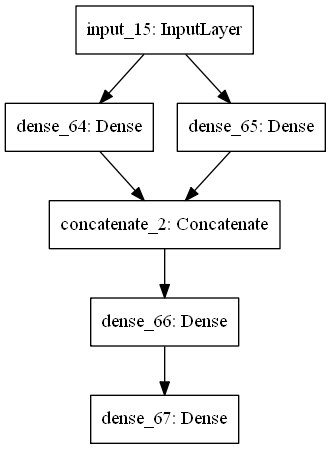

In [67]:
tf.keras.utils.plot_model(model)  # flexible한 모형 만들 수 있음

구조에 따라서 성능이 많이변함
- applications 내부에 이미 만들어진 유명한 모델 
- Connected to   로 복잡하게 연결됨 

transfer learining 에서 다룰것
- 고급 과정에서 깊게 배움

In [74]:
model=tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 8s 1us/step


In [75]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [77]:
len(model.layers)  #157 개의 layers

157

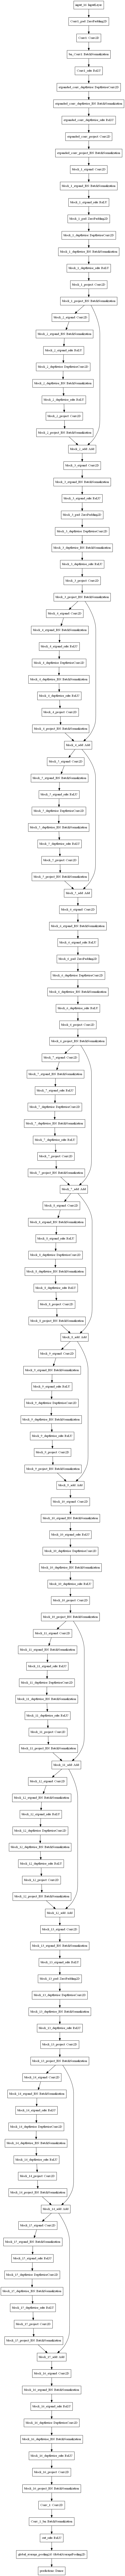

In [78]:
tf.keras.utils.plot_model(model)   #그래프가 아주 길다..

---